### **1- Backgroud:**
In this project, I am developing an algorithm that detects metastatic cancer in small sections of larger digital pathology images. The dataset used here is an adapted version of the PatchCamelyon (PCam) benchmark dataset.
The dataset contains numerous small pathology images for classification, each named by an image id. The 'train_labels.csv' file contains true labels for images in the 'train' folder, and the goal is to predict labels for the 'test' folder images. A positive label indicates that the center 32x32px region of a patch contains at least one pixel of tumor tissue.

In [ ]:
# Mount my Google Drive.
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### **2- Importing data:**

The below codes are used to import the data from Kaggle and to unzip it

In [ ]:
! pip install kaggle --quiet

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c histopathologic-cancer-detection

100% 6.31G/6.31G [03:19<00:00, 43.0MB/s]
100% 6.31G/6.31G [03:19<00:00, 34.0MB/s]


In [ ]:
! mkdir kaggle_data
! unzip {'histopathologic-cancer-detection' + ".zip"} -d kaggle_data

Streaming output truncated to the last 5000 lines.
  inflating: kaggle_data/train/fa2c546059bd262cbe954dfdba24dc0d67f598b0.tif  
  inflating: kaggle_data/train/fa2c657eff58b6802cb32843caa2fac25b67c2c9.tif  
  inflating: kaggle_data/train/fa2c775c4457d0aeb7e57216849eef5f4e72e566.tif  
  inflating: kaggle_data/train/fa2c77e1707c2fe7b0016e00736fb6e4b7f09488.tif  
  inflating: kaggle_data/train/fa2ce5e802dd281bd98fcfb538e80b9c96c2b7af.tif  
  inflating: kaggle_data/train/fa2d24e4a109d2d3a925890aaed4e0f038dfffb0.tif  
  inflating: kaggle_data/train/fa2d7e4865aa7869d2dd85116323b8405c94f1c2.tif  
  inflating: kaggle_data/train/fa2d8b2e4acf46e278e2e7acbc034c263d970737.tif  
  inflating: kaggle_data/train/fa2df9148831509a181797db79eb1a7bf39593f1.tif  
  inflating: kaggle_data/train/fa2e6db0b35484797f58005e3a6e24ca75fbca76.tif  
  inflating: kaggle_data/train/fa2e80e84594465329bdc0c8d1b3a507275fbb4d.tif  
  inflating: kaggle_data/train/fa2eaf8ec6267fa928a88775dc15ee25b633c537.tif  
  inflating: 

In [ ]:
import pandas as pd

# Load train_labels.csv
train_labels = pd.read_csv('/content/kaggle_data/train_labels.csv')


### **3- exploratory data analysis (EDA) :**

In [ ]:
train_labels.head() #displays the first five rows of the DataFrame

id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0

In [ ]:
train_labels.describe() # summary of statistics pertaining to the DataFrame train_labels

label
count  220025.000000
mean        0.405031
std         0.490899
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000

The above statistics shows that 41% of the cases have 1 as a lable which mean contains tumor tissue

In [ ]:
# Append the .tif extension to the 'id' column
train_labels['id'] = train_labels['id'] + '.tif'
train_labels.head()

id  label
0  f38a6374c348f90b587e046aac6079959adf3835.tif      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77.tif      1
2  755db6279dae599ebb4d39a9123cce439965282d.tif      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08.tif      0
4  068aba587a4950175d04c680d38943fd488d6a9d.tif      0

In [ ]:
import matplotlib.pyplot as plt

This code iterates over the first 10 .tif files in a specified directory, converts each image to a numpy array, and stores their filenames and dimensions (including channels) in a list, which it then prints.

In [ ]:
import os
import numpy as np
from PIL import Image

# Path to the directory containing .tif files
base_dir = '/content/kaggle_data/train/'

# Initialize a counter
counter = 0

# List to hold image sizes, including channels
image_shapes = []

# Loop through each file in the directory
for filename in sorted(os.listdir(base_dir)):
    if filename.lower().endswith('.tif') and counter < 10:  # Check file extension and counter
        file_path = os.path.join(base_dir, filename)  # Full path to the file
        with Image.open(file_path) as img:  # Open the image
            # Convert the image to a numpy array and get its shape
            img_array = np.array(img)
            image_shapes.append((filename, img_array.shape))  # Append filename and shape tuple to the list
            counter += 1  # Increment the counter

# Now image_shapes has the shapes of the first 10 images including channel information
for img_info in image_shapes:
    print(f"Filename: {img_info[0]}, Shape: {img_info[1]} (Height, Width, Channels)")

Filename: 00001b2b5609af42ab0ab276dd4cd41c3e7745b5.tif, Shape: (96, 96, 3) (Height, Width, Channels)
Filename: 000020de2aa6193f4c160e398a8edea95b1da598.tif, Shape: (96, 96, 3) (Height, Width, Channels)
Filename: 00004aab08381d25d315384d646f5ce413ea24b1.tif, Shape: (96, 96, 3) (Height, Width, Channels)
Filename: 0000d563d5cfafc4e68acb7c9829258a298d9b6a.tif, Shape: (96, 96, 3) (Height, Width, Channels)
Filename: 0000da768d06b879e5754c43e2298ce48726f722.tif, Shape: (96, 96, 3) (Height, Width, Channels)
Filename: 0000f8a4da4c286eee5cf1b0d2ab82f979989f7b.tif, Shape: (96, 96, 3) (Height, Width, Channels)
Filename: 00010f78ea8f878117500c445a658e5857f4e304.tif, Shape: (96, 96, 3) (Height, Width, Channels)
Filename: 00011545a495817817c6943583b294c900a137b8.tif, Shape: (96, 96, 3) (Height, Width, Channels)
Filename: 000126ec42770c7568204e2f6e07eb9a07d5e121.tif, Shape: (96, 96, 3) (Height, Width, Channels)
Filename: 00014e39b5df5f80df56f18a0a049d1cc6de430a.tif, Shape: (96, 96, 3) (Height, Width, 

the files shape is (96, 96, 3), it means a RBG 96*96 pixels




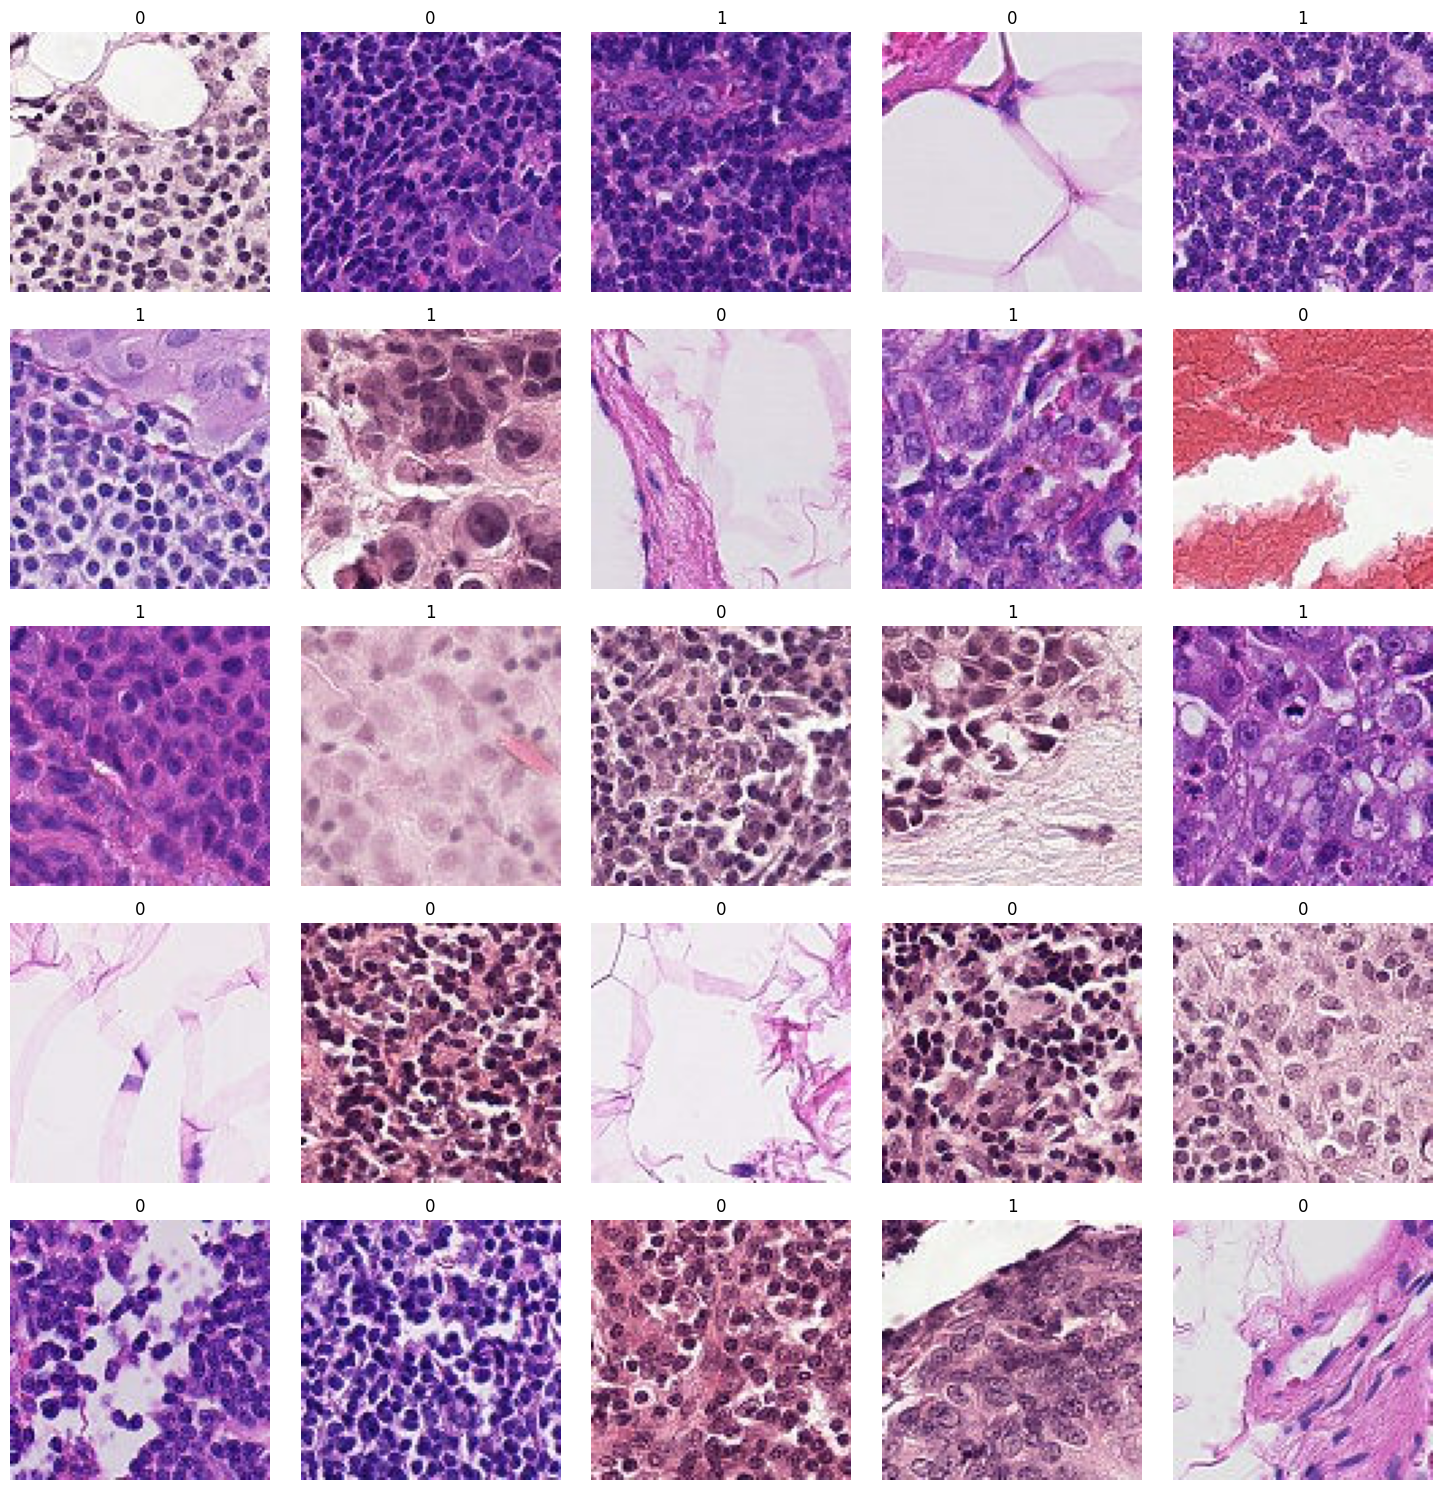

In [ ]:
# This code randomly selects 25 images from a dataset, loads them using PIL, and displays them in a 5x5 grid using matplotlib, with each image's label shown as its title.
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os



import numpy as np
# 1. Randomly select 25 image filenames and their corresponding labels
random_indices = np.random.choice(train_labels.index, 25)
random_image_paths = [os.path.join(base_dir, train_labels.iloc[idx]['id']) for idx in random_indices]
random_labels = [train_labels.iloc[idx]['label'] for idx in random_indices]
# 2. Load and display the images
plt.figure(figsize=(15, 15))
for idx, (image_path, label) in enumerate(zip(random_image_paths, random_labels)):
  img = Image.open(image_path)
  plt.subplot(5, 5, idx+1) # 5x5 grid for 25 images
  plt.imshow(img)
  plt.axis('off')
  plt.title(str(label)) # Display the label as the title
  plt.tight_layout()
plt.show()

### **4- Deeplearning Model**

In [ ]:
# This code initializes a Keras ImageDataGenerator for data augmentation and sets up training and validation generators using a DataFrame, targeting images of size 96x96 with batch size 32, and splits 5% of the data for validation.
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Initialize the ImageDataGenerator without augmentation
datagen = ImageDataGenerator(validation_split=0.05)  # Using 5% of the data for validation

# Set up generators for training and validation
train_generator = datagen.flow_from_dataframe(
    dataframe=train_labels,
    directory=base_dir,
    x_col="id",
    y_col="label",
    target_size=(96, 96),
    class_mode="raw",
    batch_size=32,
    subset="training",
    color_mode="rgb",
    shuffle=True,
    validate_filenames=True
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=train_labels,
    directory=base_dir,
    x_col="id",
    y_col="label",
    target_size=(96, 96),
    class_mode="raw",
    batch_size=32,
    subset="validation",
    color_mode="rgb",
    shuffle=True,
    validate_filenames=True
)


Found 209024 validated image filenames.
Found 11001 validated image filenames.


For this project, we decided to use the transefer learning methodology, the choice was made to use **EfficientNetB0** model

The EfficientNetB0 is a convolutional neural network architecture designed for efficiency, achieving high accuracy with fewer parameters and less compute. It uses a compound scaling method, scaling depth, width, and resolution in a balanced way.

**Pros:**

1- *High Efficiency:* Offers excellent performance with fewer parameters compared to other models, making it computationally efficient.

2- *Scalability:* The scaling method allows it to be efficiently adapted for different resource constraints without significant loss in performance.

3- *Flexibility:* Useful in a wide range of applications, from mobile devices to powerful servers.

**Cons:**

1- *Complex Scaling:* Understanding and applying the compound scaling method requires more knowledge and fine-tuning.

2- *Relative Performance:* While efficient, it may still be outperformed by larger, more computationally expensive models in resource-rich environments.

3- *Data Sensitivity:* Its performance can be significantly affected by the quality and quantity of training data.

#### **A- 1st Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the EfficientNetB0 model without the top classification layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model_1 = Sequential()

# Add the base model
model_1.add(base_model)

# Add global average pooling layer
model_1.add(GlobalAveragePooling2D())

# Add a dense layer for binary classification
model_1.add(Dense(1, activation='sigmoid'))

# Display the model summary
model_1.summary()


16705208/16705208 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 3, 3, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 4050852 (15.45 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


This code sets up an optimizer for a Keras model using Adam with an exponential decay learning rate schedule. The learning rate starts at 0.01 and decays by a factor of 0.80 every 26,128 steps, with a staircase effect. The model is then compiled with this optimizer, binary cross-entropy loss, and accuracy as the metric.

In [ ]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=26128, # 32 mini-batch 4 * 6532
    decay_rate=0.80,
    staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model_1.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])

This line of code trains model_1 for 15 epochs using the train_generator for training data and validation_generator for validation data, with the number of steps per epoch and validation steps determined by the respective sizes and batch sizes of the generators.


In [ ]:
history_1 = model_1.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=15,  # You can adjust the number of epochs
                    steps_per_epoch=train_generator.n // train_generator.batch_size,
                    validation_steps=validation_generator.n // validation_generator.batch_size)


Epoch 1/15
6532/6532 [==============================] - 181s 25ms/step - loss: 0.3812 - accuracy: 0.8384 - val_loss: 0.3732 - val_accuracy: 0.8376
Epoch 2/15
6532/6532 [==============================] - 163s 25ms/step - loss: 0.3783 - accuracy: 0.8417 - val_loss: 0.3544 - val_accuracy: 0.8493
Epoch 3/15
6532/6532 [==============================] - 161s 25ms/step - loss: 0.3767 - accuracy: 0.8428 - val_loss: 0.3438 - val_accuracy: 0.8590
Epoch 4/15
6532/6532 [==============================] - 161s 25ms/step - loss: 0.3770 - accuracy: 0.8424 - val_loss: 0.3967 - val_accuracy: 0.8354
Epoch 5/15
6532/6532 [==============================] - 161s 25ms/step - loss: 0.3665 - accuracy: 0.8456 - val_loss: 0.3730 - val_accuracy: 0.8417
Epoch 6/15
6532/6532 [==============================] - 160s 25ms/step - loss: 0.3663 - accuracy: 0.8462 - val_loss: 0.3301 - val_accuracy: 0.8616
Epoch 7/15
6532/6532 [==============================] - 163s 25ms/step - loss: 0.3671 - accuracy: 0.8454 - val_loss: 0

After running 15 epochs, the model achieved training and validation accuracies of 85.10% and 85.37%, respectively. These close accuracies indicate a balanced model without significant overfitting. The below accuracy and loss plots over epochs helps understanding how the model is learning and generalizing.

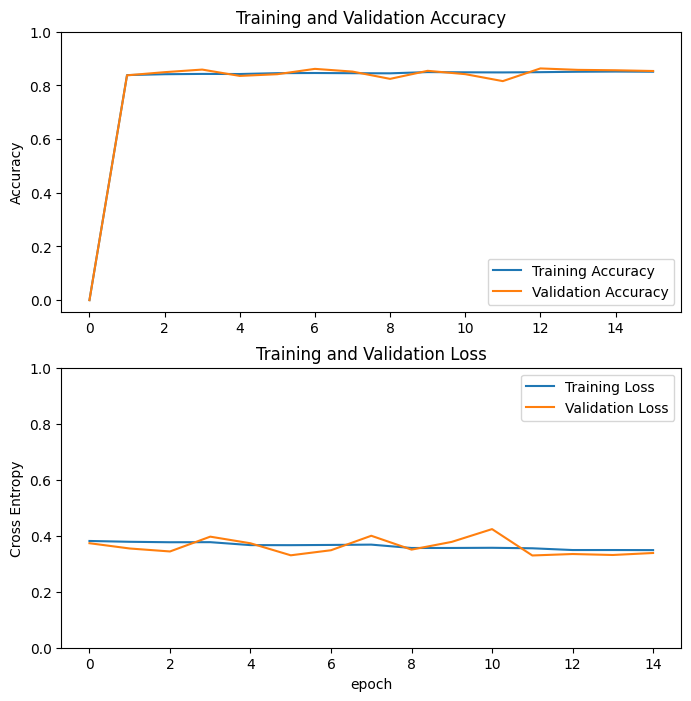

In [ ]:
acc = [0.] + history_1.history['accuracy']
val_acc = [0.] + history_1.history['val_accuracy']

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

This code initializes an ImageDataGenerator without augmentation for test data and sets up a test data generator from a specified directory, targeting images of size 96x96, with a batch size of 32, no class labels (class_mode=None), no shuffling, and a fixed seed for reproducibility.

In [ ]:
test_datagen = ImageDataGenerator()
test_path = "/content/kaggle_data/test/"

test_generator = test_datagen.flow_from_directory(
    test_path,
    batch_size=32,
    target_size=(96, 96),
    class_mode=None,
    shuffle=False,
    seed=0
)



Found 57458 images belonging to 1 classes.


In [ ]:
predictions_1 = model_1.predict(test_generator, steps=len(test_generator))

1796/1796 [==============================] - 42s 23ms/step


This line of code uses model_1 to make predictions on the data provided by test_generator, with the number of prediction steps set to the length of test_generator.

In [ ]:
# Extract filenames from the generator
filenames = test_generator.filenames

# Remove directory and file extension from filenames
image_ids = [filename.split('\\')[-1].split('.')[0].split('/')[-1] for filename in filenames]

# Create a submission dataframe
submission = pd.DataFrame({
    'id': image_ids,
    'label': (predictions_1 > 0.5).astype(int).squeeze()

})

# Save the dataframe to a CSV file
submission.to_csv('submission_1.csv', index=False)

The accuracy of the test set is 83.17%


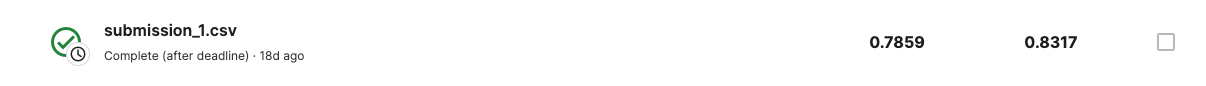

In [ ]:
base_model = model_1.layers[0]
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))





Number of layers in the base model:  238


#### **B- 2nd Model**

The new model will utilize EfficientNetB0, applying transfer learning to the first 180 layers while fine-tuning the remaining 58 layers. This approach leverages pre-trained knowledge in the initial layers and customizes the latter layers to better fit specific data, potentially enhancing performance and accuracy.

In [ ]:
# Create a new model
model_2 = Sequential()

# Add the base model
model_2.add(base_model)

# Add global average pooling layer
model_2.add(GlobalAveragePooling2D())

# Add a dense layer for binary classification
model_2.add(Dense(1, activation='sigmoid'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 3, 3, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 4050852 (15.45 MB)
Trainable params: 4008829 (15.29 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________


In [ ]:
# Fine-tune from this layer onwards
fine_tune_at = 180

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Define a BinaryCrossentropy loss function. Use from_logits=True
loss_function=tf.keras.losses.BinaryCrossentropy(from_logits=False)
# Define an Adam optimizer with a learning rate of 0.1 * initial_learning_rate
optimizer =  tf.keras.optimizers.Adam(learning_rate=0.1 * initial_learning_rate)
# Use accuracy as evaluation metric
metrics=['accuracy']



model_2.compile(loss=loss_function,
              optimizer = optimizer,
              metrics=['accuracy'])

In [ ]:
fine_tune_epochs = 15
initial_epochs =15
total_epochs =  initial_epochs + fine_tune_epochs



history_2 = model_2.fit(train_generator,
                        validation_data=validation_generator,
                        epochs=total_epochs,
                        initial_epoch=history_1.epoch[-1],
                        steps_per_epoch=train_generator.n // train_generator.batch_size,
                        validation_steps=validation_generator.n // validation_generator.batch_size)

Epoch 15/30
6532/6532 [==============================] - 181s 26ms/step - loss: 0.2781 - accuracy: 0.8872 - val_loss: 0.2131 - val_accuracy: 0.9191
Epoch 16/30
6532/6532 [==============================] - 167s 26ms/step - loss: 0.2170 - accuracy: 0.9146 - val_loss: 0.1827 - val_accuracy: 0.9305
Epoch 17/30
6532/6532 [==============================] - 169s 26ms/step - loss: 0.1872 - accuracy: 0.9271 - val_loss: 0.1725 - val_accuracy: 0.9334
Epoch 18/30
6532/6532 [==============================] - 167s 26ms/step - loss: 0.1648 - accuracy: 0.9364 - val_loss: 0.1690 - val_accuracy: 0.9353
Epoch 19/30
6532/6532 [==============================] - 172s 26ms/step - loss: 0.1473 - accuracy: 0.9439 - val_loss: 0.1719 - val_accuracy: 0.9359
Epoch 20/30
6532/6532 [==============================] - 172s 26ms/step - loss: 0.1323 - accuracy: 0.9496 - val_loss: 0.1733 - val_accuracy: 0.9365
Epoch 21/30
6532/6532 [==============================] - 171s 26ms/step - loss: 0.1190 - accuracy: 0.9545 - val_

This approach significantly enhanced accuracy, achieving 97.58% on the training set and 93.95% on the validation set. The low variation between these figures indicates effective learning and generalization capabilities of the model.


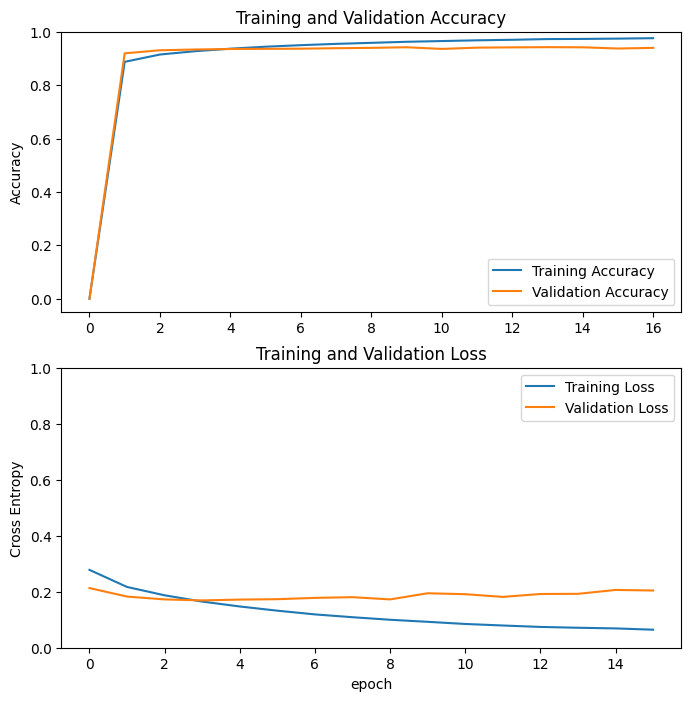

In [ ]:
acc = [0.] + history_2.history['accuracy']
val_acc = [0.] + history_2.history['val_accuracy']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
predictions_2 = model_2.predict(test_generator, steps=len(test_generator))

1796/1796 [==============================] - 42s 23ms/step


In [ ]:
# Extract filenames from the generator
filenames = test_generator.filenames

# Remove directory and file extension from filenames
image_ids = [filename.split('\\')[-1].split('.')[0].split('/')[-1] for filename in filenames]

# Create a submission dataframe
submission = pd.DataFrame({
    'id': image_ids,
    'label': (predictions_2 > 0.5).astype(int).squeeze()

})

# Save the dataframe to a CSV file
submission.to_csv('submission_2.csv', index=False)

The accuracy of the test set is 84.84%, an improvement of 1.5%

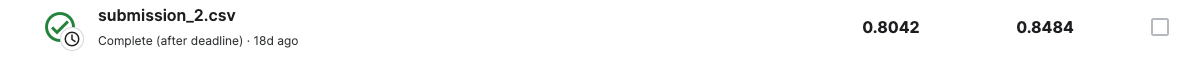

#### **C- 3rd Model**

In this model we will continue utilizing EfficientNetB0, applying transfer learning to the first 150 layers while fine-tuning the remaining 88 layers. This approach leverages pre-trained knowledge in the initial layers and customizes the latter layers to better fit specific data, potentially enhancing performance and accuracy.
Further, we will apply the L2 regularization to reduce the risk of overfitting and to try to reduce the variace.

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
model_3 = Sequential()

# Add the base model
model_3.add(base_model)

# Add global average pooling layer
model_3.add(GlobalAveragePooling2D())

# Add a dense layer for binary classification
model_3.add(Dense(1, activation='sigmoid'))

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 3, 3, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 4050852 (15.45 MB)
Trainable params: 2671041 (10.19 MB)
Non-trainable params: 1379811 (5.26 MB)
_________________________________________________________________


In [ ]:
# Fine-tune from this layer onwards
fine_tune_at = 150

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Define a BinaryCrossentropy loss function. Use from_logits=True
loss_function=tf.keras.losses.BinaryCrossentropy(from_logits=False)

# Define an Adam optimizer with a learning rate of 0.1 * initial_learning_rate
optimizer =  tf.keras.optimizers.Adam(learning_rate=0.1 * initial_learning_rate)

# Use accuracy as evaluation metric
metrics=['accuracy']

model_3.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

model_3.compile(loss=loss_function,
                optimizer = optimizer,
                metrics=['accuracy'])

In [ ]:
fine_tune_epochs = 15
initial_epochs =30
total_epochs =  initial_epochs + fine_tune_epochs



history_3 = model_3.fit(train_generator,
                        validation_data=validation_generator,
                        epochs=total_epochs,
                        initial_epoch=history_2.epoch[-1],
                        steps_per_epoch=train_generator.n // train_generator.batch_size,
                        validation_steps=validation_generator.n // validation_generator.batch_size)

Epoch 30/45
6532/6532 [==============================] - 172s 26ms/step - loss: 0.3198 - accuracy: 0.9739 - val_loss: 0.3725 - val_accuracy: 0.9400
Epoch 31/45
6532/6532 [==============================] - 174s 27ms/step - loss: 0.3232 - accuracy: 0.9715 - val_loss: 0.3767 - val_accuracy: 0.9369
Epoch 32/45
6532/6532 [==============================] - 173s 27ms/step - loss: 0.3212 - accuracy: 0.9727 - val_loss: 0.3679 - val_accuracy: 0.9433
Epoch 33/45
6532/6532 [==============================] - 171s 26ms/step - loss: 0.3206 - accuracy: 0.9738 - val_loss: 0.3726 - val_accuracy: 0.9382
Epoch 34/45
6532/6532 [==============================] - 169s 26ms/step - loss: 0.3205 - accuracy: 0.9735 - val_loss: 0.3749 - val_accuracy: 0.9376
Epoch 35/45
6532/6532 [==============================] - 169s 26ms/step - loss: 0.3196 - accuracy: 0.9743 - val_loss: 0.3755 - val_accuracy: 0.9366
Epoch 36/45
6532/6532 [==============================] - 169s 26ms/step - loss: 0.3187 - accuracy: 0.9746 - val_

This approach reduced slighty the variance between the training and the validation by around 0.5%

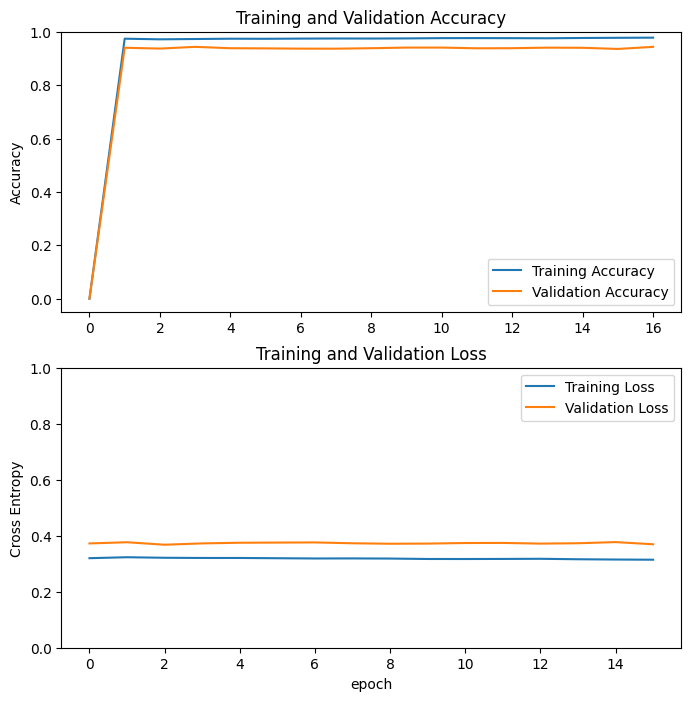

In [ ]:
acc = [0.] + history_3.history['accuracy']
val_acc = [0.] + history_3.history['val_accuracy']

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
predictions_3 = model_3.predict(test_generator, steps=len(test_generator))

1796/1796 [==============================] - 42s 23ms/step


In [ ]:
# Extract filenames from the generator
filenames = test_generator.filenames

# Remove directory and file extension from filenames
image_ids = [filename.split('\\')[-1].split('.')[0].split('/')[-1] for filename in filenames]

# Create a submission dataframe
submission = pd.DataFrame({
    'id': image_ids,
    'label': (predictions_3 > 0.5).astype(int).squeeze()

})

# Save the dataframe to a CSV file
submission.to_csv('submission_3.csv', index=False)

The accuracy of the test set is 85.,49%, an improvement of 0.65%

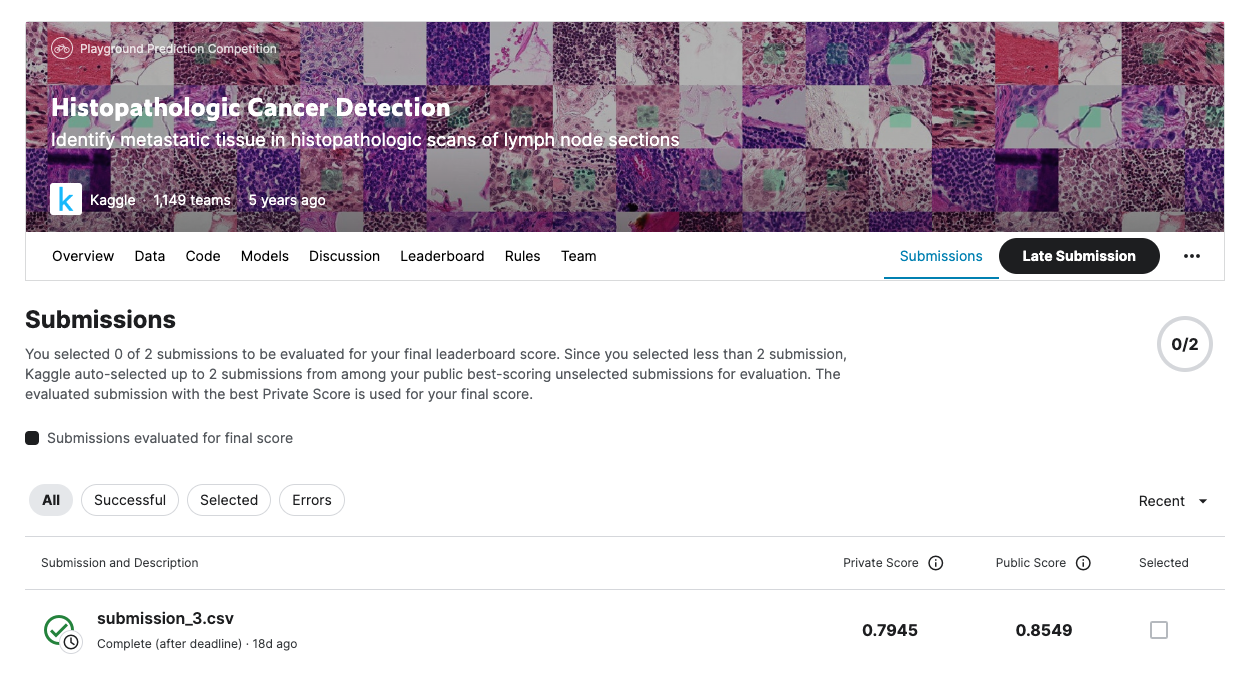

#### **5- Conclusion**
The transfer learning approach successfully achieved high accuracy with low variance. Fine-tuning further enhanced this by reducing both bias and variance, as evidenced in the plots for the three models. Notably, after approximately the third epoch, there were no significant improvements in either loss or accuracy. The decision to run 15 epochs was to maximize training improvement potential, but in hindsight, implementing early stopping could have been a more efficient strategy in these cases.